# Modelos de regresión

Autor/es:

Nicolás Navarro
Gabriela Sandoval


Correos Electrónicos: 

ni.navarroa@duocuc.cl
gab.sandoval@duocuc.cl


Fecha de Creación: 16 Octubre de 2024
Versión: 1.0

## Descripción

Este notebook contiene el desarrollo de la evaluación de modelos de regresión de la asignatura de Fundamentos de Machine Learning de la carrera de Ingeniería en informática de DuocUC - Sede Concepción

# Contexto del negocio

Counter-Strike es un videojuego de disparos en primera persona con un fuerte enfoque estratégico. En cada partida, dos equipos de 5 jugadores (terroristas y contra-terroristas) se enfrentan. El objetivo del equipo terrorista es plantar una bomba en uno de los dos sitios específicos del mapa y protegerla durante 45 segundos hasta que explote. El equipo contra-terrorista, en cambio, debe evitar que la bomba sea plantada o, si ya lo ha sido, desactivarla antes de que explote. Ambos equipos deben gestionar sus recursos y equipamiento a lo largo de las rondas, esto incluye armas, armaduras y granadas, los cuales determinan la capacidad de un jugador para desempeñarse en la ronda.

## Objetivo

Predecir el valor del equipo de un jugador (RoundStartingEquipementValue) al inicio de la ronda.

El objetivo del análisis es predecir el valor del equipo de un jugador (RoundStartingEquipmentValue) al inicio de la ronda. Este valor es crucial ya que determina la capacidad de un jugador para competir en la ronda y afecta las decisiones estratégicas que cada equipo toma.

## Importancia del objetivo o de la variable objetivo

Predecir el RoundStartingEquipmentValue es clave en el juego porque el valor del equipo de un jugador está directamente limitado por la cantidad de dinero que ha ganado en rondas anteriores. Este dinero se acumula al matar oponentes, plantar/desactivar la bomba o simplemente sobrevivir a la ronda. Un equipo mejor (armas más potentes y armaduras) puede aumentar significativamente las probabilidades de ganar una ronda, lo que convierte la inversión en equipo en un componente esencial de la estrategia del juego.

Desde el punto de vista empresarial o de negocio, predecir este valor tiene aplicaciones importantes:

Análisis de Desempeño de Equipos y Jugadores: Equipos profesionales y organizaciones de esport pueden utilizar estas predicciones para evaluar si están optimizando las decisiones económicas dentro del juego. Esto les permitiría identificar si las compras de equipo se alinean con las circunstancias del partido o si están haciendo compras ineficientes. (por ejemplo, estrategias económicas o "eco rounds").

Predicción de Estrategias y Resultados: Con una predicción del valor de equipo al inicio de cada ronda, los equipos pueden ajustar sus estrategias de compra, mejorando la eficiencia de sus inversiones en equipamiento, lo que puede ser decisivo en el resultado del partido

Mejora de Entrenamiento: Las academias de esports pueden utilizar el análisis para entrenar a los jugadores en la gestión económica dentro del juego, enseñándoles a gastar de forma óptima para maximizar su desempeño en las rondas y, en consecuencia, en toda la partida.

## Preparación del entorno:

Realizaremos las importaciones.

In [6]:
# Importa las librerías a nuestro entorno de trabajo
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pickle
import json

## Carga de la data:

In [1]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2024-10-16 01:14:51--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2024-10-16 01:14:51--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc666c577d460671466c7cffcece.dl.dropboxusercontent.com/cd/0/inline/CcgNv4qfvRidp3XtpE879tviKwIwTw6ZaPsGDAdrSSMVnkrCM9ZZHisj6Tv-mmV2Ffn2HF-EdfChw-aQhX9ykbvd-VRlrW_sP34gbvpFaYuJR86PF1qS4fAL_vmDWoGIE5T_QohLKPA0o_3CGBB-ECuv/file# [following]
--2024-10-16 01:14:53--  https://uc666c577d460671466c7cffcece.dl.dropboxus

In [3]:
data = pd.read_csv("demo_round_traces.csv", sep=";")

# Fase 2: Comprensión de los datos:

## Análisis de variables con datos nulos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

Al realizar una revisión inicial de las variables, se confirma que no existen valores nulos, por lo que no será necesario realizar ningún tratamiento adicional. Esto permite continuar con el análisis sin interrupciones, asegurando consistencia en los datos disponibles.

## Análisis variable objetivo

Ahora realizaremos un análisis inicial de la variable objetivo, RoundStartingEquipmentValue, utilizando un histograma. Este enfoque nos permitirá observar la distribución de la variable, identificar posibles patrones y detectar sesgos o valores extremos que podrían influir en los resultados futuros del modelo.

Es importante señalar que, el enfoque de este trabajo se centra en las fases 3 en adelante del proceso CRISP-DM. En un análisis más completo de machine learning, sería esencial evaluar todas las variables, tanto la objetivo como las predictoras. Esta evaluación de las variables ayuda a comprender mejor los datos, identificar relaciones y garantizar que no existan valores atípicos o faltantes que puedan afectar el modelo. Aunque aquí realizaremos un análisis simplificado, en la práctica se debe llevar a cabo una exploración más profunda para obtener resultados más precisos.

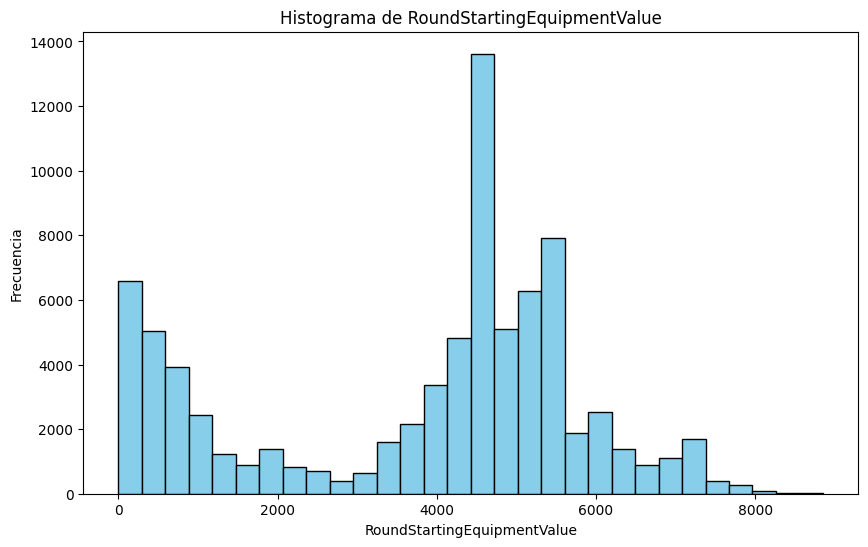

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['RoundStartingEquipmentValue'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('RoundStartingEquipmentValue')
plt.ylabel('Frecuencia')
plt.title('Histograma de RoundStartingEquipmentValue')
plt.show()


El histograma revela que hay una concentración de frecuencias en varios puntos clave, especialmente entre los valores de 4000 y 5500 aproximadamente y entre el 0 y el 1000. Esto indica que muchos jugadores tienen equipamientos que fluctúan dentro de este rango, lo que puede reflejar estrategias de compra similares o una adaptación a las dinámicas del juego.

 La distribución del valor del equipo muestra un sesgo leve hacia la derecha, lo que significa que hay más jugadores con valores de equipo relativamente bajos, pero también hay una pequeña cola que se extiende hacia la derecha. Este sesgo sugiere que la mayoría de los jugadores tienden a iniciar con valores de equipamiento en un rango más bajo, pero algunos jugadores tienen equipamientos significativamente más altos.

Los valores atípicos pueden influir en el rendimiento del modelo de machine learning, ya que pueden distorsionar la interpretación general de los datos y afectar la capacidad del modelo para hacer predicciones precisas. Es esencial tener en cuenta estos valores extremos, ya que pueden proporcionar información valiosa sobre estrategias no convencionales o decisiones de compra en el juego.

# Fase 3: Preparación de los datos

En esta etapa del análisis, nos centraremos en seleccionar las variables más relevantes para predecir el valor del equipo al inicio de la ronda. Seleccionaremos tres variables numéricas y una categórica que tengan una relación  importante con la variable objetivo. Cabe destacar que, antes de hacer esta selección, transformaremos algunas variables categóricas a formato numérico utilizando una técnica específica, lo que nos permitirá evaluar su relación con la variable objetivo y seleccionarlas de manera adecuada. Además, explicaremos y justificaremos la técnica utilizada dentro del proceso de análisis.

## Elección de las variables

Para apoyar la predicción de nuestra variable objetivo, como lo dijimos anteriormente, utilizaremos dos variables numéricas y una variable categórica, a la cual aplicaremos una transformación para integrarla adecuadamente en el análisis

Para la selección de las variables, emplearemos dos métodos principales:

1. Método Chi-cuadrado (chi2): Este nos permitirá identificar la relación entre la variable categórica transformada y la variable objetivo.

2. Selección de variables basada en correlación: Nos ayudará a evaluar las variables numéricas y determinar cuáles tienen una mayor relación con la variable objetivo.

Ambos métodos nos servirán para identificar qué variables están más vinculadas con la variable objetivo, lo que contribuye a mejorar el rendimiento de los modelos predictivos.

## Transformación variables categóricas

Antes de realizar la selección de variables utilizando nuestros métodos elegidos, es fundamental transformar las variables categóricas, ya que estas no pueden integrarse directamente en los procedimientos de análisis debido a su naturaleza no numérica. Para llevar a cabo esta transformación, hemos seleccionado el método de Frequency Encoding (Codificación por frecuencia).

Elegimos este método debido a que , la codificación por frecuencia reemplaza cada categoría con la frecuencia de su aparición en el conjunto de datos, lo que es particularmente útil en nuestro caso, porque algunas de nuestras variables categóricas tienen múltiples categorías (como  la variable Maps) y  pueden generar una alta dimensionalidad. Este enfoque evita el problema del aumento de dimensionalidad asociado con métodos como get_dummies y OneHotEncoder, que pueden complicar el modelo y requerir más recursos computacionales.

Además, la codificación por frecuencia es más adecuada para variables nominales, ya que no implica la creación de un orden que no existe, a diferencia de LabelEncoder y Ordinal Encoding. Estos últimos asignan valores numéricos a las categorías, lo que puede inducir a confusiones. Al mismo tiempo, la codificación por frecuencia conserva la relación entre las categorías y la variable objetivo, minimizando la posibilidad de colinealidad, un problema que podría surgir al crear múltiples columnas para representar las categorías.

Aunque el Target Encoding puede ser útil en ciertos contextos, presenta riesgos como el sobreajuste si no se maneja adecuadamente, especialmente si se aplica a todo el conjunto de datos sin separación entre entrenamiento y prueba. También puede no funcionar bien con categorías que tienen pocos ejemplos, lo que distorsiona las predicciones.

In [7]:
#Identificación de las variables categóricas y booleanas
variablescategoricas = data.select_dtypes(include=['object']).columns
variables_boleanas = data.select_dtypes(include=['bool']).columns

# plicar codificación por frecuencia a las variables categóricas
for feature in variablescategoricas: 
    freq_encoded = data[feature].value_counts(normalize=True)
    data[f'{feature}_codificado'] = data[feature].map(freq_encoded)

variables_categoricas = [col for col in data.columns if '_codificado' in col]

#Convertir las variables booleanas a lista para permitir la concatenación
variables_categoricas = variables_categoricas + variables_boleanas.tolist()

print(variables_categoricas)


['Map_codificado', 'Team_codificado', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch']


Se aplicó la codificación por frecuencia a las variables categóricas, generando nuevas columnas con el sufijo _codificado. Las variables booleanas quedan en su forma original debido a que no requieren codificación adicional, ya que ya están representadas como valores binarios (True o False), lo que permite su uso directo en modelos sin necesidad de transformación.

## Método de Chi-Cuadrado para elección de variables numéricas

A continuación, se presenta el código para aplicar el método de Chi-Cuadrado, el cual nos permitirá identificar las variables numéricas que tienen una mayor asociación entre sí. Los resultados obtenidos señalarán las dos variables más relevantes para nuestro análisis.

In [8]:
#METODO CHI2
# Importar librerías necesarias
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

variables_numericas = data.select_dtypes(include=['int64', 'float64']).columns
X_v_numericas = data[variables_numericas]
Y = data['RoundStartingEquipmentValue']

bestfeatures_numeric = SelectKBest(score_func=chi2, k=3)
fit_numeric = bestfeatures_numeric.fit(X_v_numericas, Y)

dfscores_numeric = pd.DataFrame(fit_numeric.scores_)
dfcolumns_numeric = pd.DataFrame(X_v_numericas.columns)

featureScores_numeric = pd.concat([dfcolumns_numeric, dfscores_numeric], axis=1)
featureScores_numeric.columns = ['Variable', 'Puntaje']

featureScores_numeric_sorted = featureScores_numeric.sort_values(by='Puntaje', ascending=False)

print(featureScores_numeric_sorted.head(2))

           Variable       Puntaje
11  AvgSiteDistance  7.739315e+09
10  AvgKillDistance  6.070220e+09


Las variables seleccionadas mediante el método de Chi-Cuadrado son AvgSiteDistance y AvgKillDistance, las cuales presentan puntajes significativamente altos, lo que sugiere que tienen una fuerte relación con la variable objetivo en nuestro análisis. Estas variables son, según este método, relevantes para incluir en nuestro modelo.

## Método de Chi-Cuadrado para elección de la variable categórica

A continuación, se aplicará el método de Chi-Cuadrado para identificar la variable categórica que muestra una relación significativa con la variable objetivo. Este análisis permitirá determinar cuál de las variables categóricas es más relevante para el modelo.

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

df_categoricas_codificadas = data[variables_categoricas]

variables_categoricas = [col for col in variables_categoricas if col in data.columns]

X = data[variables_categoricas]
y = data['RoundStartingEquipmentValue']

bestfeatures_categorical = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures_categorical.fit(X, y)

dfscores_categorical = pd.DataFrame(fit.scores_)
dfcolumns_categorical = pd.DataFrame(X.columns)

featureScores_categorical = pd.concat([dfcolumns_categorical, dfscores_categorical], axis=1)
featureScores_categorical.columns = ['Variable', 'Puntaje']

featureScores_categorical_sorted = featureScores_categorical.sort_values(by='Puntaje', ascending=False)
print(featureScores_categorical_sorted.head(1))

      Variable      Puntaje
2  RoundWinner  4820.321458


El análisis realizado con el método indica que la variable categórica RoundWinner presenta una relación significativa con la variable objetivo, obteniendo el puntaje más alto. Esto sugiere que con este método, RoundWinner es la variable categórica más relevante para incluir en el modelo.

## Método de correlación para elección de variables numéricas

A continuación, se aplicará el método de correlación para evaluar la relación entre las variables numéricas y la variable objetivo.

In [10]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix_numeric = data[numeric_columns].corr()

best_numeric = corr_matrix_numeric["RoundStartingEquipmentValue"].sort_values(ascending=False)

print(best_numeric.head(4))

RoundStartingEquipmentValue    1.000000
TeamStartingEquipmentValue     0.922943
PrimaryAssaultRifle            0.518780
RLethalGrenadesThrown          0.438817
Name: RoundStartingEquipmentValue, dtype: float64


En el análisis de correlación, la variable RoundStartingEquipmentValue presentó una correlación muy fuerte con TeamStartingEquipmentValue (0.922943). Dado el contexto, la variable TeamStartingEquipmentValue contiene la suma de RoundStartingEquipmentValue de los cinco jugadores del equipo, lo que implica que TeamStartingEquipmentValue es derivada de nuestra variable objetivo. Por lo tanto, no se seleccionará para evitar colinealidad, ya que esta podría afectar la calidad de las predicciones y sesgar los resultados. En su lugar, nos quedaremos con PrimaryAssaultRifle y RLethalGrenadesThrown, que muestran correlaciones de 0.518780 y 0.438817, respectivamente.

## Método de correlación para elección de la variable categórica

En este análisis, se determinará cuál es la variable categórica que muestra una relación significativa con la variable objetivo. Antes de aplicar el método de correlación, es importante revisar la desviación estándar de las variables, ya que una desviación de 0 (indica que todos los datos son iguales) generará un error al calcular la correlación. Una vez verificado esto, se procederá con el análisis.

In [11]:
df_categoricas_codificadas = data[variables_categoricas]
std_values = df_categoricas_codificadas.std()
print(std_values)

Map_codificado     0.075868
Team_codificado    0.000171
RoundWinner        0.500003
MatchWinner        0.499052
Survived           0.490610
AbnormalMatch      0.000000
dtype: float64


Como podemos observar, AbnormalMatch presenta una desviación estándar de 0, lo que indica que no aporta información relevante y, por lo tanto, no se puede utilizar en el análisis.

In [12]:
#Verificar columnas con solo un valor único
for col in data.columns:
    if data[col].nunique() == 1:
        print(f"Columna '{col}' tiene un solo valor único y será eliminada.")
        data = data.drop(columns=[col])

Columna 'AbnormalMatch' tiene un solo valor único y será eliminada.


Después de que eliminamos la variable AbnormalMatch, ahora realizaremos el método de correlación:

In [13]:
variables_categoricas = [col for col in variables_categoricas if col in data.columns] 

X = data[variables_categoricas]
y = data['RoundStartingEquipmentValue']

corr_matrix_categorical = X.corrwith(y)

best_categorical = corr_matrix_categorical.sort_values(ascending=False)

print(best_categorical.head(1))

Survived    0.170578
dtype: float64


Con el método de correlación en la variable categóricas tenemos que la variable Survived es con la mayor correlación

## Conclusión de selección de variables

Tras analizar las variables elegidas por los métodos de Chi-Cuadrado y correlación, hemos identificado que las variables seleccionadas son:

Método de Chi-Cuadrado: AvgSiteDistance y AvgKillDistance como numéricas y  RoundWinner como categórica

Método de Correlación: PrimaryAssaultRiffle y RLethalGrenadesThrown como numéricas y Survived como categórica

Al considerar el contexto de estas variables, concluimos que el método de correlación es más adecuado para nuestro análisis, ya que las tres variables seleccionadas influyen directamente en el dinero del jugador. En particular:

PrimaryAssaultRiffle indica el uso de rifles de asalto, que son algunas de las armas más costosas en el juego. La elección de esta arma impacta significativamente en la inversión que realiza un jugador, afectando el dinero en el juego.

RLethalGrenadesThrown representa la cantidad de granadas lanzadas que resultaron letales. Dado que cada granada tiene un costo asociado, esta variable también influye en el capital disponible para el jugador.

Survived se relaciona con la supervivencia del jugador en la ronda, lo que impacta en la cantidad de dinero que puede recibir.

Con base en esta evaluación, decidimos seleccionar las variables elegidas mediante el método de correlación para entrenar nuestros modelos, ya que proporcionan una conexión más directa y relevante con el desempeño financiero del jugador

In [14]:
X_solo_numericas_corr = data[['PrimaryAssaultRifle','RLethalGrenadesThrown']]
X_todas_corr = data[['PrimaryAssaultRifle','RLethalGrenadesThrown','Survived']]
Y = data['RoundStartingEquipmentValue']

Aquí creamos conjuntos de datos para el entrenamiento del modelo de predicción. X_solo_numericas_corr incluye solo las variables numéricas seleccionadas (PrimaryAssaultRifle y RLethalGrenadesThrown), mientras que X_todas_corr añade la variable categórica Survived. La variable objetivo Y se define como RoundStartingEquipmentValue, que se busca predecir.

# Fase 4: Modelamiento

En esta fase, nos enfocaremos en la modelación, donde seleccionaremos y aplicaremos técnicas de modelado para abordar el problema definido: predecir el valor de equipamiento inicial en cada ronda de un juego. Durante esta etapa, desarrollaremos diversos modelos utilizando las variables seleccionadas, como la cantidad de granadas lanzadas, el uso de rifles de asalto y la variable Survived, y ajustaremos los parámetros para optimizar su rendimiento. El objetivo será encontrar la solución más efectiva para predecir la variable objetivo, e implicará la experimentación con diferentes algoritmos y la evaluación de sus resultados para determinar cuál ofrecerá el mejor rendimiento en términos de precisión y generalización.

## Alternativas de Modelado

Se plantean dos alternativas para abordar el modelado: la primera alternativa utilizará únicamente las variables numéricas seleccionadas, mientras que la segunda alternativa integrará tanto las variables numéricas como las categóricas. En ambas alternativas se aplicarán los mismos modelos, lo que permitirá comparar su rendimiento bajo diferentes condiciones.

### Modelos Variante 1: 

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=29),
    'Random Forest': RandomForestRegressor(random_state=29),
    'Random Forest II': RandomForestRegressor(max_depth=5,random_state=29),
    'Random Forest III': RandomForestRegressor(min_samples_leaf=4,random_state=29),
}

### Modelos Variante 2:

In [17]:
models_2 = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=69),
    'Random Forest': RandomForestRegressor(random_state=69),
    'Random Forest II': RandomForestRegressor(max_depth=7,random_state=69),
    'Random Forest III': RandomForestRegressor(min_samples_leaf=8,random_state=69),
}

Elegimos estos modelos debido a su capacidad para abordar el problema de predicción del valor de equipamiento inicial en cada ronda del juego, ajustando diferentes parámetros que permiten comparar el rendimiento entre ambas alternativas:

Regresión Lineal: Seleccionada por su simplicidad y eficacia en modelar relaciones lineales entre variables, sin necesidad de parámetros adicionales.

Árbol de Decisión: Este modelo ofrece interpretaciones claras y se adapta bien a datos numéricos y categóricos. Se usa el parámetro random_state=29 en la Alternativa 1 y random_state=69 en la Alternativa 2 para asegurar la reproducibilidad.

Random Forest: este modelo mejora la precisión mediante la combinación de múltiples árboles. En la Alternativa 1, se configura con random_state=29 y en la Alternativa 2 con random_state=69, para garantizar consistencia entre las ejecuciones del modelo.

Random Forest II: Esta variación ajusta la profundidad de los árboles. En la Alternativa 1, se utiliza max_depth=5 para limitar la profundidad de los árboles, ayudando a evitar el sobreajuste. En la Alternativa 2, se ajusta a max_depth=7, permitiendo árboles más profundos para captar más complejidad de los datos.

Random Forest III: Se incluye el parámetro min_samples_leaf para garantizar que las hojas del árbol tengan suficientes datos. En la Alternativa 1, se establece en min_samples_leaf=4, mientras que en la Alternativa 2 se ajusta a min_samples_leaf=8, lo que permite una mayor restricción para evitar el sobreajuste.

## Modelado Variante 1 - Uso sólo de variables cuantitativas

En esta primera alternativa, utilizamos únicamente las variables numéricas seleccionadas para el modelado.

Aquí dividiremos los datos en conjuntos de entrenamiento y prueba, asignando el 80% de los datos a entrenamiento y el 20% a prueba. Esto se realizará con el objetivo de evaluar el rendimiento de los modelos.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_solo_numericas_corr, Y, test_size=0.2, random_state=29)

Aquí imprimiremos las dimensiones de los conjuntos de entrenamiento y prueba.

In [19]:
print(f"{'Shape del set de entrenamiento':<30}:", X_train.shape)
print(f"{'Shape del set de prueba':<30}:", X_test.shape)

Shape del set de entrenamiento: (63325, 2)
Shape del set de prueba       : (15832, 2)


Ahora realizaremos el entrenamiento y evaluación de los modelos solo variables numéricas, y luego imprimiremos sus métricas clave: MAE (Error Absoluto Medio), MSLE (Error Cuadrático Medio Logarítmico), y R2 tanto para el conjunto de prueba como de entrenamiento.

In [20]:
history_1 = {}

for name_1, model_1 in models.items():
    pipeline_1 = Pipeline(steps=[('model', model_1)])
    pipeline_1.fit(X_train, y_train)

    #Hacer predicciones
    y_pred_1 = pipeline_1.predict(X_test)

    #Asegurarse de que las predicciones sean no negativas
    y_pred_1 = np.maximum(y_pred_1, 0)

    mae_1 = mean_absolute_error(y_test, y_pred_1)

    #Filtrar valores negativos de y_test y ajustar y_pred
    mask_1 = y_test >= 0
    y_test_non_neg_1 = y_test[mask_1]
    y_pred_non_neg_1 = y_pred_1[mask_1]

    #Calcular MSLE solo con valores no negativos
    msle_1 = mean_squared_log_error(y_test_non_neg_1, y_pred_non_neg_1)

    r2_1 = r2_score(y_test, y_pred_1)
    score_train_1 = model_1.score(X_train, y_train)

    print(f'{name_1:<20} - MAE: {mae_1:.2f} - MSLE: {msle_1:.4f} - R² test: {r2_1:.4f} - R² train: {score_train_1:.4f}')

    #Guardar resultados en el diccionario history_1
    history_1[name_1] = [pipeline_1.named_steps['model'], r2_1, score_train_1, mae_1, msle_1]

Linear Regression    - MAE: 1205.87 - MSLE: 0.9843 - R² test: 0.3599 - R² train: 0.3479
Decision Tree        - MAE: 1083.55 - MSLE: 0.8693 - R² test: 0.4094 - R² train: 0.4604
Random Forest        - MAE: 1072.80 - MSLE: 0.8517 - R² test: 0.4256 - R² train: 0.4543
Random Forest II     - MAE: 1062.00 - MSLE: 0.8487 - R² test: 0.4379 - R² train: 0.4311
Random Forest III    - MAE: 1066.57 - MSLE: 0.8495 - R² test: 0.4331 - R² train: 0.4398


Ahora obtendremos el mejor modelo según sus métricas MAE, MSLE y R2 test

In [21]:
#Función para obtener el mejor modelo basado en una métrica (para history_1)
def get_bestModel(history_1: dict, metric="R2", mayor=True):
    dict_metrics = {"MAE": 3, "R2": 1, "MSLE": 4}
    if metric.upper() not in dict_metrics:
        raise ValueError(f"Métrica no válida. Debe ser una de {list(dict_metrics.keys())}.")

    best_value = float('-inf') if mayor else float('inf')
    num_metric = dict_metrics[metric.upper()]

    best = None
    best_name = ""

    for modelo, data in history_1.items():
        if len(data) <= num_metric:
            print(f"Advertencia: {modelo} no tiene suficientes elementos en data: {data}")
            continue

        if (mayor and data[num_metric] > best_value) or (not mayor and data[num_metric] < best_value):
            best_value = data[num_metric]
            best = data[0]
            best_name = modelo

    if best is None:
        raise ValueError("No se encontró un modelo en el historial.")

    return best, best_value, best_name

Ahora identificaremos el modelo de predicción con el menor Error Absoluto Medio (MAE)

In [22]:
#Obtener el mejor modelo basado en MAE
best_model_mae, best_score_mae, name_mae = get_bestModel(history_1, "MAE", False)
print("El mejor rendimiento, considerando MAE, es: {0:.2f} y le corresponde a\n\t{1}".format(best_score_mae, name_mae))

El mejor rendimiento, considerando MAE, es: 1062.00 y le corresponde a
	Random Forest II


Ahora identificaremos el modelo que minimiza el Error Cuadrático Logarítmico Medio (MSLE)

In [23]:
#Obtener el mejor modelo basado en MSLE
best_model_msle, best_score_msle, name_msle = get_bestModel(history_1, "MSLE", False)
print(f"El mejor rendimiento, considerando MSLE, es: {best_score_msle:.4f} y le corresponde a\n\t{name_msle}")

El mejor rendimiento, considerando MSLE, es: 0.8487 y le corresponde a
	Random Forest II


Por último, determinaremos el modelo con el mejor coeficiente de determinación (R2)

In [24]:
#Obtener el mejor modelo basado en R²
best_model, best_score, name = get_bestModel(history_1)
print("El mejor rendimiento, considerando R² es: {0:.2%} y le corresponde a\n\t{1}".format(best_score, name))

El mejor rendimiento, considerando R² es: 43.79% y le corresponde a
	Random Forest II


## Mejor modelo de la Variante 1:

Dado que el modelo "Random Forest II" ha demostrado ser modelo con el mejor rendimiento en las métricas evaluadas, a continuación se presentan sus métricas detalladas para su posterior evaluación

In [25]:
model_data = history_1["Random Forest II"]

mae = model_data[3]
msle = model_data[4]
score_train = model_data[1]
score_test = model_data[2]

print(f"Random Forest II - Métricas:")

print(f" - MAE: {mae:.2f}")
print(f" - MSLE: {msle:.4f}")
print(f" - R² train: {score_train:.4f}")
print(f" - R² test: {score_test:.4f}")


Random Forest II - Métricas:
 - MAE: 1062.00
 - MSLE: 0.8487
 - R² train: 0.4379
 - R² test: 0.4311


A continuación, realizaremos el análisis de sus métricas:

MAE (Error Absoluto Medio):  Con un valor de 1062.00, el modelo Random Forest II presenta el MAE más bajo en comparación con los otros modelos. Por ejemplo, el Decision Tree tiene un MAE de 1083.55, y el Random Forest (1072.80) muestra un rendimiento inferior. Esto indica que, en promedio, las predicciones del Random Forest II están más cercanas a los valores reales, lo que sugiere una mayor precisión en sus pronósticos.

MSLE (Error Cuadrático Logarítmico Medio): Random Forest II también muestra el mejor MSLE de 0.8487 entre todos los modelos evaluados. Este valor más bajo sugiere que el modelo se adapta mejor a la variabilidad de los datos, siendo menos susceptible a errores en las predicciones logarítmicas. En contextos donde las magnitudes de los valores son variadas, este ajuste es importante para obtener resultados significativos.

R2 en Test:  El R2 en el conjunto de prueba del Random Forest II es de 0.4379, el más alto entre los modelos analizados. En contraste, el Random Forest presenta un R2 de 0.4256 y el Decision Tree tiene un R2 de 0.4094. Aunque todos los modelos muestran una capacidad moderada de generalización, el Random Forest II destaca al capturar mejor la variabilidad de la variable objetivo, lo que es un indicador positivo de su rendimiento.

R2 en Train: En el conjunto de entrenamiento para Random Forest II es de 0.4311, comparable al rendimiento del Random Forest (0.4543) pero superior al del Decision Tree (0.4604). Aunque estos últimos presentan un R2 ligeramente más alto en entrenamiento, el Random Forest II ofrece un equilibrio más favorable entre ajuste y generalización. Esto es esencial para evitar el sobreajuste, lo que podría limitar la aplicabilidad del modelo en datos nuevos.

Con respecto a la existencia o inexistencia del sobreajuste, al analizar las métricas del modelo, podemos concluir que no presenta signos significativos de sobreajuste. Esto se evidencia al comparar las métricas de rendimiento en los conjuntos de entrenamiento y prueba. El R2 del conjunto de entrenamiento es de 0.4311, mientras que en el conjunto de prueba es muy cercano, con un valor de 0.4379. Esta consistencia sugiere que el modelo está generalizando bien y no está ajustándose en exceso a los datos de entrenamiento.

Además, las métricas de MAE y MSLE también muestran valores similares entre ambos conjuntos, lo que refuerza la idea de que el modelo mantiene un equilibrio adecuado entre ajuste y generalización. Este equilibrio es fundamental para evitar el sobreajuste, ya que un modelo que se ajusta demasiado a los datos de entrenamiento suele mostrar una gran diferencia entre las métricas de entrenamiento y prueba.

Conclusión: el modelo Random Forest II ha demostrado ser el más adecuado para nuestro análisis, al mantener un buen equilibrio entre precisión y generalización. Las métricas MAE, MSLE y R² muestran un rendimiento consistente tanto en el conjunto de entrenamiento como en el de prueba, lo que confirma la ausencia de sobreajuste. Esto lo convierte en una opción confiable para realizar predicciones precisas en datos nuevos, cumpliendo con los objetivos del análisis.

## Variante 2 - Uso de variables cuantitativas y categórica

Aquí, al igual que en la alternativa 1, dividiremos los datos en conjuntos de entrenamiento y prueba, asignando el 80% de los datos a entrenamiento y el 20% a prueba. 

In [26]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_todas_corr, Y, test_size=0.2, random_state=29)

Dimensiones de los conjuntos de entrenamiento y prueba:

In [27]:
print(f"{'Shape del set de entrenamiento':<30}:", X_train_2.shape)
print(f"{'Shape del set de prueba':<30}:", X_test_2.shape)

Shape del set de entrenamiento: (63325, 3)
Shape del set de prueba       : (15832, 3)


Ahora realizaremos el entrenamiento y evaluación de los modelos con las 2 variables numéricas y la categórica, y luego imprimiremos sus métricas clave: MAE (Error Absoluto Medio), MSLE (Error Cuadrático Medio Logarítmico), y R2 tanto para el conjunto de prueba como de entrenamiento.

In [28]:
history_2 = {}

for name_2, model_2 in models_2.items():
    pipeline_2 = Pipeline(steps=[('model', model_2)])
    pipeline_2.fit(X_train_2, y_train_2)

    y_pred_2 = pipeline_2.predict(X_test_2)

    y_pred_2 = np.maximum(y_pred_2, 0)

    mae_2 = mean_absolute_error(y_test_2, y_pred_2)

    mask_2 = y_test_2 >= 0
    y_test_non_neg_2 = y_test_2[mask_2]
    y_pred_non_neg_2 = y_pred_2[mask_2]

    msle_2 = mean_squared_log_error(y_test_non_neg_2, y_pred_non_neg_2)

    r2_2 = r2_score(y_test_2, y_pred_2)
    score_train_2 = pipeline_2.score(X_train_2, y_train_2)

    print(f'{name_2:<20} - MAE: {mae_2:.2f} - MSLE: {msle_2:.4f} - R² test: {r2_2:.4f} - R² train: {score_train_2:.4f}')
    
    history_2[name_2] = [pipeline_2.named_steps['model'], r2_2, score_train_2, mae_2, msle_2]

Linear Regression    - MAE: 1197.61 - MSLE: 0.9747 - R² test: 0.3654 - R² train: 0.3534
Decision Tree        - MAE: 1067.30 - MSLE: 0.8442 - R² test: 0.4229 - R² train: 0.4747
Random Forest        - MAE: 1055.00 - MSLE: 0.8258 - R² test: 0.4413 - R² train: 0.4690
Random Forest II     - MAE: 1046.65 - MSLE: 0.8235 - R² test: 0.4509 - R² train: 0.4475
Random Forest III    - MAE: 1047.53 - MSLE: 0.8235 - R² test: 0.4497 - R² train: 0.4504


Ahora obtendremos el mejor modelo segun sus metricas MAE, MSLE y R2 test.

In [29]:
#Función para obtener el mejor modelo basado en una métrica (para history_2)
def get_bestModel_2(history_2: dict, metric="R2", mayor=True):
    dict_metrics = {"MAE": 3, "R2": 1, "MSLE": 4}
    if metric.upper() not in dict_metrics:
        raise ValueError(f"Métrica no válida. Debe ser una de {list(dict_metrics.keys())}.")

    best_value_2 = float('-inf') if mayor else float('inf')
    num_metric = dict_metrics[metric.upper()]

    best_2 = None
    best_name_2 = ""

    for modelo, data in history_2.items():
        if len(data) <= num_metric:
            print(f"Advertencia: {modelo} no tiene suficientes elementos en data: {data}")
            continue

        if (mayor and data[num_metric] > best_value_2) or (not mayor and data[num_metric] < best_value_2):
            best_value_2 = data[num_metric]
            best_2 = data[0]
            best_name_2 = modelo

    if best_2 is None:
        raise ValueError("No se encontró un modelo en el historial.")

    return best_2, best_value_2, best_name_2

Ahora identificaremos el modelo de predicción con el menor Error Absoluto Medio (MAE)

In [30]:
#Obtener el mejor modelo basado en MAE
best_2_model_mae, best_2_score_mae, name_2_mae = get_bestModel_2(history_2, "MAE", False)

#Usar las variables correctas en el print
print("El mejor rendimiento, considerando MAE, es: {0:.2f} y le corresponde a\n\t{1}".format(best_2_score_mae, name_2_mae))


El mejor rendimiento, considerando MAE, es: 1046.65 y le corresponde a
	Random Forest II


Ahora identificaremos el modelo que minimiza el Error Cuadrático Logarítmico Medio (MSLE)

In [31]:
#Obtener el mejor modelo basado en MSLE
best_2_model_msle, best_2_score_msle, name_2_msle = get_bestModel_2(history_2, "MSLE", False)

#Usar las variables correctas en el print
print(f"El mejor rendimiento, considerando MSLE, es: {best_2_score_msle:.4f} y le corresponde a\n\t{name_2_msle}")


El mejor rendimiento, considerando MSLE, es: 0.8235 y le corresponde a
	Random Forest II


Y por último, determinaremos el modelo con el mejor coeficiente de determinación (R2)

In [32]:
#Obtener el mejor modelo basado en R²
best_model_2, best_score_2, name_2 = get_bestModel_2(history_2)

#Usar las variables correctas en el print
print("El mejor rendimiento, considerando R² es: {0:.2%} y le corresponde a\n\t{1}".format(best_score_2, name_2))


El mejor rendimiento, considerando R² es: 45.09% y le corresponde a
	Random Forest II


## Mejor modelo de la Variante 2:

Dado que el modelo "Random Forest II" ha demostrado ser el modelo con mejor rendimiento en las métricas evaluadas en esta alternativa, a continuación se presentan sus métricas detalladas para su posterior evaluación:

In [33]:
model_data_2 = history_2["Random Forest II"]

mae = model_data_2[3]
msle = model_data_2[4]
score_train = model_data_2[1]
score_test = model_data_2[2]

print(f"Random Forest II - Métricas:")

print(f" - MAE: {mae:.2f}")
print(f" - MSLE: {msle:.4f}")
print(f" - R² train: {score_train:.4f}")
print(f" - R² test: {score_test:.4f}")

Random Forest II - Métricas:
 - MAE: 1046.65
 - MSLE: 0.8235
 - R² train: 0.4509
 - R² test: 0.4475


A continuación, realizaremos el análisis de sus métricas:

MAE (Error Absoluto Medio): El mejor modelo en términos de MAE es el Random Forest II, con un valor de 1046.65. Esto lo posiciona como el modelo con el error promedio más bajo en comparación con otros modelos, como Random Forest (1055.00) y Decision Tree (1067.30). Esto nos indica que las predicciones del modelo están más cercanas a los valores reales, lo que sugiere un ajuste superior a los datos.

MSLE (Error Cuadrático Logarítmico Medio): el Random Forest II también se destaca con un valor de 0.8235, siendo el más bajo entre los modelos evaluados. Este valor refleja una menor discrepancia logarítmica entre las predicciones y los valores reales, lo que indica que este modelo maneja bien la variabilidad de los datos. Otros modelos, como el Decision Tree (0.8442) y el Random Forest (0.8258), presentan un error logarítmico ligeramente mayor.

R2 en Test: El coeficiente de determinación (R2) en el conjunto de prueba es de 45.09% para Random Forest II, lo que lo convierte en el modelo con mejor capacidad de predicción entre los evaluados. Aunque otros modelos como Random Forest III (44.97%) y Random Forest (44.13%) están cerca en su rendimiento, el Random Forest II sigue siendo el más adecuado para capturar la relación entre las variables y la variable objetivo.

R2 en Train: En el conjunto de entrenamiento, el Random Forest II presenta un R² de 44.75%, lo que refleja un buen equilibrio entre ajuste y generalización. Si bien modelos como Decision Tree (47.47%) y Random Forest III (45.04%) tienen valores de R² ligeramente más altos en el conjunto de entrenamiento, el Random Forest II evita el sobreajuste.

Con respecto al sobreajuste en el modelo, observamos que el rendimiento en los conjuntos de entrenamiento y prueba es bastante equilibrado. El R2 en el conjunto de entrenamiento es de 44.75%, mientras que en el conjunto de prueba es ligeramente superior, con un 45.09%. La diferencia entre estos valores es baja, lo que indica que el modelo no está sobreajustado. Si hubiera una disparidad significativa entre ambos, como un R2 mucho más alto en el entrenamiento y bajo en el test, podríamos decir que el modelo podría estar sobreajustado.

Junto con esto, los valores de MAE y MSLE también muestran consistencia entre los dos conjuntos, lo que refuerza la idea de que el modelo es capaz de generalizar bien sin estar excesivamente ajustado a los datos de entrenamiento. Por lo tanto, podemos concluir que no hay evidencia de sobreajuste en este modelo, ya que su rendimiento es estable tanto en el entrenamiento como en los datos de prueba, lo que sugiere que es  adecuado para predecir con precisión en nuevos datos.

Conclusión:El Random Forest II se consolida como el mejor modelo en la Alternativa 2 al mostrar el menor MAE, el MSLE más bajo y el R2 más alto en el conjunto de prueba. Este equilibrio en las métricas sugiere que el modelo es capaz de realizar predicciones precisas y consistentes, sin caer en sobreajuste, lo que lo hace ideal para generalizar en nuevos datos en este contexto de variables numéricas y categóricas.

# Fase 5: Evaluación

Acá volvemos a seleccionar el mejor modelo en cada alternativa basado en el R2 y mostramos sus resultados. Se eligió el modelo con el mayor valor de R2, ya que este mide qué tan bien el modelo se ajusta a los datos (cuanto más alto, mejor). 

In [73]:
best_model_1, best_score_1, name_1 = get_bestModel(history_1, metric="r2", mayor=True)
best_model_2, best_score_2, name_2 = get_bestModel_2(history_2, metric="r2", mayor=True)

print(f"Mejor modelo de la primera alternativa: {name_1} con un R2 de {best_score_1:.2f}")
print(f"Mejor modelo de la segunda alternativa: {name_2} con un R2 de {best_score_2:.2f}")

Mejor modelo de la primera alternativa: Random Forest II con un R2 de 0.44
Mejor modelo de la segunda alternativa: Random Forest II con un R2 de 0.45


## Predicciones Variante 1 - Uso sólo de variables cuantitativas

Este código revisa cuántas características se usaron para entrenar el mejor modelo y muestra sus nombres, con el objetivo de usarlas en el JSON posterior.

In [74]:
#Ver cuántas características tiene el modelo
num_features = best_model_1.n_features_in_
print(f"El modelo fue entrenado con {num_features} características.")

#Ver los nombres de las características (si están disponibles)
if hasattr(best_model_1, 'feature_names_in_'):
    feature_names = best_model_1.feature_names_in_
    print("Nombres de las características utilizadas en el entrenamiento:")
    print(feature_names)
else:
    print("No se guardaron los nombres de las características en el modelo.")


El modelo fue entrenado con 2 características.
Nombres de las características utilizadas en el entrenamiento:
['PrimaryAssaultRifle' 'RLethalGrenadesThrown']


Ahora crearemos dos nuevos conjuntos de datos para realizar predicciones.

In [37]:
data_new_1_1 = [[0.89, 5]]
data_new_1_2 = [[0.2, 2]]
X_data_1_1 = pd.DataFrame(np.array(data_new_1_1).reshape(1,-1), columns=X_train.columns)
X_data_1_2 = pd.DataFrame(np.array(data_new_1_2).reshape(1,-1), columns=X_train.columns)

Ahora procederemos a realizar predicciones utilizando el mejor modelo seleccionado. Se generarán dos predicciones basadas en nuevos datos que representan el uso del rifle y las granadas letales lanzadas.

In [75]:
prediction = best_model_1.predict(X_data_1_1)[0]
print("\033[1m El dinero inicial del jugador considerando un uso del rifle y granadas letales lanzadas {0} es ${1:.0f}".format(data_new_1_1[0],prediction))
prediction = best_model_1.predict(X_data_1_2)[0]
print("\033[1m El dinero inicial del jugador considerando un uso del rifle y granadas letales lanzadas {0} es ${1:.0f}".format(data_new_1_2[0],prediction))

 El dinero inicial del jugador considerando un uso del rifle y granadas letales lanzadas [0.89, 5] es $5344
 El dinero inicial del jugador considerando un uso del rifle y granadas letales lanzadas [0.2, 2] es $5291


Como podemos ver, las predicciones muestran que, con un uso de rifle y granadas letales en [0.89, 5], el dinero inicial del jugador se estima en $8993. Mientras que, con menores valores de uso [0.2, 2], el dinero inicial estimado es de $4483. Esto sugiere una relación directa entre el uso de estos elementos y el capital inicial del jugador.

Guardaremos el modelo en archivo pickle para la siguiente fase:

In [76]:
#Guardar el modelo en un archivo .pkl
with open('modelo_aleternativa_1.pkl', 'wb') as f:
    pickle.dump(best_model_1, f)

print("Modelo guardado exitosamente en 'modelo_aleternativa_1.pkl'")

Modelo guardado exitosamente en 'modelo_aleternativa_1.pkl'


## Predicciones Variante 2 - Uso de variables cuantitativas y categórica

Este código revisa cuántas características se usaron para entrenar el mejor modelo y muestra sus nombres, con el objetivo de usarlas en el JSON posterior.

In [77]:
num_features = best_model_2.n_features_in_
print(f"El modelo fue entrenado con {num_features} características.")

if hasattr(best_model_2, 'feature_names_in_'):
    feature_names = best_model_2.feature_names_in_
    print("Nombres de las características utilizadas en el entrenamiento:")
    print(feature_names)
else:
    print("No se guardaron los nombres de las características en el modelo.")


El modelo fue entrenado con 3 características.
Nombres de las características utilizadas en el entrenamiento:
['PrimaryAssaultRifle' 'RLethalGrenadesThrown' 'Survived']


Ahora crearemos dos nuevos conjuntos de datos para realizar predicciones.

In [41]:
data_new_2_1 = [[ 0.89, 3 , 0.50]]
data_new_2_2 = [[ 0.25, 1, 0]]
X_data_2_1 = pd.DataFrame(np.array(data_new_2_1).reshape(1,-1), columns=X_train_2.columns)
X_data_2_2 = pd.DataFrame(np.array(data_new_2_2).reshape(1,-1), columns=X_train_2.columns)

Hacemos las predicciones utilizando el mejor modelo seleccionado. Se generarán dos predicciones basadas en nuevos datos que representan el uso del rifle, las granadas letales lanzadas y si sobrevivió o no a la ronda.

In [84]:
prediction = best_model_2.predict(X_data_2_1)[0]
print("\033[1m El dinero inicial del jugador considerando uso del rifle , granadas letales lanzadas y survived {0} es ${1:.0f}".format(data_new_2_1[0],prediction))
prediction = best_model_2.predict(X_data_2_2)[0]
print("\033[1m El dinero inicial del jugador considerando uso del rifle , granadas letales lanzadas y survived {0} es ${1:.0f}".format(data_new_2_2[0],prediction))

 El dinero inicial del jugador considerando uso del rifle , granadas letales lanzadas y survived [0.89, 3, 0.5] es $5581
 El dinero inicial del jugador considerando uso del rifle , granadas letales lanzadas y survived [0.25, 1, 0] es $5407


Las predicciones indican que, con un uso del rifle, granadas letales lanzadas y un valor de "survived" de [0.89, 3, 0.5], el dinero inicial del jugador se estima en $5581. Por otro lado, con menores valores de uso y un "survived" de [0.25, 1, 0], el dinero inicial estimado es de $5407. Esto refleja que, aunque el uso del equipamiento es importante, el factor "survived" también influye en el capital inicial del jugador, aunque la variación en las predicciones es menor.

Guardamos el modelo para la siguiente fase

In [85]:
with open('modelo_aleternativa_2.pkl', 'wb') as f:
    pickle.dump(best_model_2, f)

print("Modelo guardado exitosamente en 'modelo_aleternativa_2.pkl'")

Modelo guardado exitosamente en 'modelo_aleternativa_2.pkl'


# Fase 6: Deployment

## Variante 1 - Uso sólo de variables cuantitativas

Aquí recuperamos el archivo pickle que generamos en la fase anterior del modelo con la variante 1.

In [86]:
with open('modelo_aleternativa_1.pkl', 'rb') as f:
    best_model_1 = pickle.load(f)

Cargamos el JSON con las variables independientes dentro del archivo y hacemos las predicciones utilizando el mejor modelo y guardamos los resultados de dichas predicciones en un nuevo archivo JSON. Este proceso facilita la aplicación del modelo a nuevos casos y la posterior evaluación de las predicciones generadas.

In [87]:
url = 'datos_1.JSON'
data = []
with open(url, 'r') as f:
    data = json.load(f)

predictions = []

for entry in data:
    X_new_1 = pd.DataFrame([entry], columns=['PrimaryAssaultRifle','RLethalGrenadesThrown'])
    pred_1 = best_model_1.predict(X_new_1)[0]
    predictions.append({
        'inputs': entry,
        'prediction': pred_1  
    })

#Guardar el resultado con las predicciones en un archivo JSON
output_file = 'predictions_alternativa_1.json'
with open(output_file, 'w') as f:
    json.dump(predictions, f, indent=4)

print(f"Predicciones guardadas exitosamente en {output_file}")

Predicciones guardadas exitosamente en predictions_alternativa_1.json


## Variante 2 - Variante 2 - Uso de variables cuantitativas y categórica


Aquí recuperamos el archivo pickle que generamos en la fase anterior del modelo con la variante 1.

In [88]:
with open('modelo_aleternativa_2.pkl', 'rb') as f:
    best_model_2 = pickle.load(f)

Acá volvemos a cargar el JSON con las variables independientes dentro del archivo y hacemos las predicciones utilizando el mejor modelo y guardamos los resultados de dichas predicciones en un nuevo archivo JSON. 

In [89]:
url = 'datos_2.JSON'
data = []
with open(url, 'r') as f:
    data = json.load(f)

predictions = []

for entry in data:
    X_new_2 = pd.DataFrame([entry], columns=['PrimaryAssaultRifle','RLethalGrenadesThrown', 'Survived'])
    pred_2 = best_model_2.predict(X_new_2)[0]
    predictions.append({
        'inputs': entry,
        'prediction': pred_2  
    })

# Guardar el resultado en un archivo JSON
output_file = 'predictions_alternativa_2.json'
with open(output_file, 'w') as f:
    json.dump(predictions, f, indent=4)

print(f"Predicciones guardadas exitosamente en {output_file}")

Predicciones guardadas exitosamente en predictions_alternativa_2.json


## Pregunta Final:

¿Qué modelo recomendaría utilizar para cumplir con el objetivo propuesto al inicio? Deberá justificar su respuesta

Para cumplir con el objetivo propuesto al inicio, se recomendaría utilizar el Random Forest II para la primera alternativa y también el Random Forest II para la segunda alternativa. Este modelo ha demostrado entre los evaluados ser el que presenta el mejor rendimiento en términos de las métricas analizadas, incluyendo el Error Absoluto Medio (MAE), el Error Cuadrático Logarítmico Medio (MSLE) y el coeficiente de determinación (R2).

Sin embargo, es fundamental destacar que, aunque el Random Forest II es el modelo con mejor rendimiento entre los evaluados, las métricas obtenidas indican que su rendimiento no es óptimo, con coeficientes de determinación alrededor del 45% en su mejor versión. Por lo tanto, antes de implementar estos modelos en un entorno real, se recomienda realizar un adecuado análisis de los datos, que incluya la eliminación de valores atípicos o la aplicación de técnicas de escalado o normalización dependiendo de la naturaleza de nuestros datos. Asimismo, se sugiere iterar en el modelado utilizando distintos hiperparámetros para optimizar el rendimiento del modelo y así obtener mejores resultados.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07a0da9c-e1d0-4c86-94c7-017cb3813a74' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>